# Projeto 3 - Ciência dos dados

## Eduardo Tirta
## Felipe Sigiani

As variáveis escolhidas serão Mortalidade Infantil, como variável resposta. Para as variáveis explicativas, serão utilizadas os gastos em saúde por pessoa e  a alimentação.

O projeto pretende mostrar como os gastos e a alimentação pode afetar no índice de mortalidade infantil.

<img src=alimentacao.jpg >

<img src=gastoemsaude.jpg >

## Como o investimento na saúde e a boa alimentação pode auxiliar na vida de crianças?

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R
from statsmodels.api import add_constant

In [2]:
dados = pd.read_excel('dados.xlsx',index_col=0)

In [3]:
dados.head()


,Under_five_mortality,Food_Consumption,Health_Spending,Improved_Sanitation
Abkhazia,NaN,NaN,NaN,NaN
Afghanistan,123.2,NaN,20.665594,34.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN
Albania,21.5,2849.36,160.909881,88.0
Algeria,35.1,3090.13,88.985323,93.0


In [4]:
dados=dados[~np.isnan(dados.Under_five_mortality)]
dados=dados[~np.isnan(dados.Food_Consumption)]
dados=dados[~np.isnan(dados.Health_Spending)]
dados=dados[~np.isnan(dados.Improved_Sanitation)]

In [5]:
dados.head()

,Under_five_mortality,Food_Consumption,Health_Spending,Improved_Sanitation
Albania,21.5,2849.36,160.909881,88.0
Algeria,35.1,3090.13,88.985323,93.0
Angola,206.7,1893.70,25.861014,49.0
Antigua and Barbuda,12.9,2161.48,458.726671,95.0
Argentina,17.9,3029.91,332.449662,90.0


In [6]:
d = pd.DataFrame()

In [7]:
x= dados.Food_Consumption
y= dados.Health_Spending

m = sum(a*b for (a,b) in zip(x,y)) - sum(x) * sum(y) / len(x)
m /= sum(a**2 for a in x) - (sum(x)**2)/len(x)
b = sum(y)/len(y) - m * sum(x)/len(x)

print(m,b)
print(m*0.8 + b)

1.51594807513 -3442.7913223
-3441.57856384


## Gráfico

### Alimentação e Gasto de Saúde

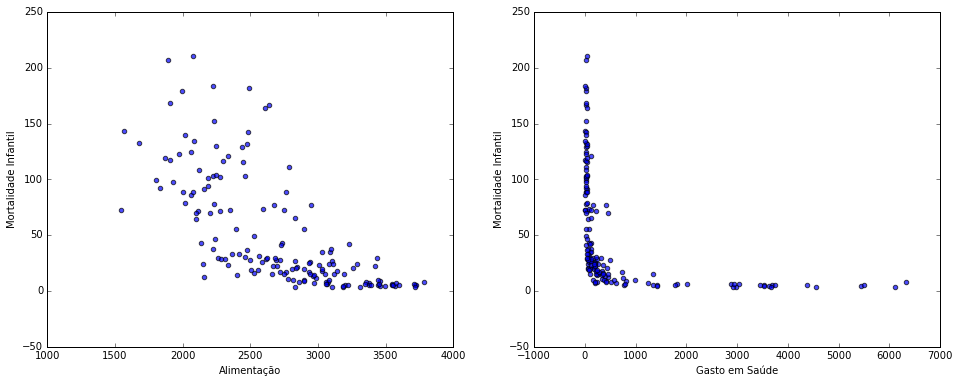

In [8]:
f, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(dados.Food_Consumption, dados.Under_five_mortality, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Alimentação")
ax[0].set_ylabel("Mortalidade Infantil")

ax[1].scatter(dados.Health_Spending, dados.Under_five_mortality, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("Gasto em Saúde")
ax[1].set_ylabel("Mortalidade Infantil")

## Gráfico com escala logarítima

### Alimentação e Log de Alimentação

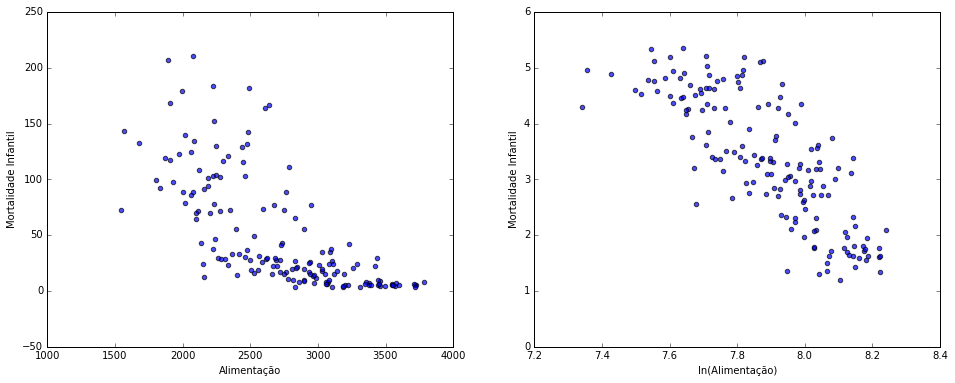

In [9]:
f, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(dados.Food_Consumption, dados.Under_five_mortality, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Alimentação")
ax[0].set_ylabel("Mortalidade Infantil")

ax[1].scatter(np.log(dados.Food_Consumption), np.log(dados.Under_five_mortality), alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("ln(Alimentação)")
ax[1].set_ylabel("Mortalidade Infantil")

### Gasto em Saúde e Log do Gasto de Saúde

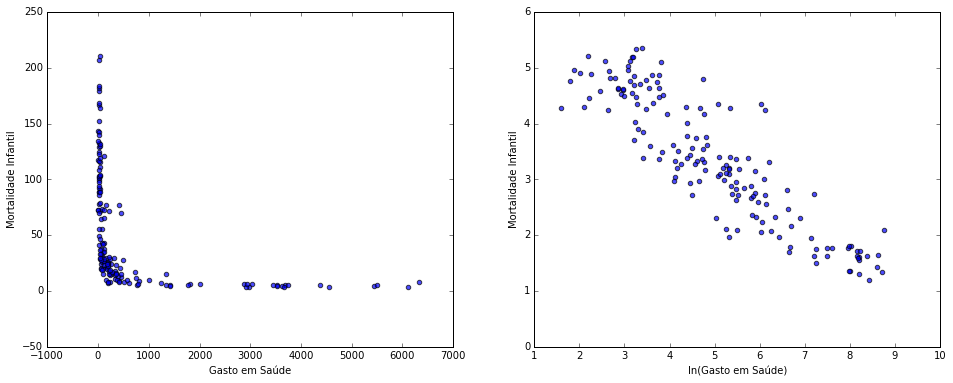

In [10]:
f, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(dados.Health_Spending, dados.Under_five_mortality, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Gasto em Saúde")
ax[0].set_ylabel("Mortalidade Infantil")

ax[1].scatter(np.log(dados.Health_Spending), np.log(dados.Under_five_mortality), alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("ln(Gasto em Saúde)")
ax[1].set_ylabel("Mortalidade Infantil")

## Correlações

In [11]:
dados.corr(method='pearson')

,Under_five_mortality,Food_Consumption,Health_Spending,Improved_Sanitation
Under_five_mortality,1.000000,-0.701560,-0.418857,-0.842170
Food_Consumption,-0.701560,1.000000,0.606652,0.712761
Health_Spending,-0.418857,0.606652,1.000000,0.457212
Improved_Sanitation,-0.842170,0.712761,0.457212,1.000000


In [12]:
dados['nUnder_five_mortality'] = np.log(dados['Under_five_mortality'])
dados['nFood_Consumption'] = np.log(dados['Food_Consumption'])
dados['nHealth_Spending'] = np.log(dados['Health_Spending'])
dados['nImproved_Sanitation'] = np.log(dados['Improved_Sanitation'])


## Gráfico em 3D

<IPython.core.display.Javascript object>


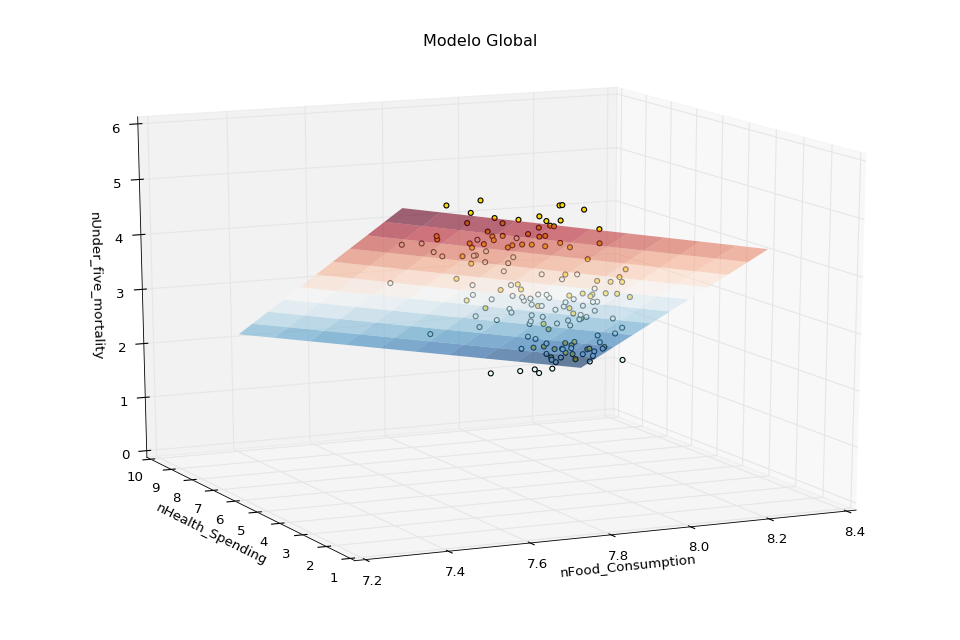

In [16]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

X = dados[['nFood_Consumption', 'nHealth_Spending']]
y = dados['nUnder_five_mortality']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.nFood_Consumption.min(), X.nFood_Consumption.max(), 100), 
                       np.linspace(X.nHealth_Spending.min(), X.nHealth_Spending.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].nFood_Consumption, X[resid >= 0].nHealth_Spending, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].nFood_Consumption, X[resid < 0].nHealth_Spending, y[resid < 0], c='lightCyan', alpha=1.0)

ax.set_xlabel('nFood_Consumption')
ax.set_ylabel('nHealth_Spending')
ax.set_zlabel('nUnder_five_mortality')
ax.set_title('Modelo Global')
plt.show()

## Regressão

In [14]:
model = sm.ols(formula='nUnder_five_mortality ~ nFood_Consumption + nHealth_Spending', data = dados) # Describe Model
results = model.fit() # Fit model
print (results.summary())

                              OLS Regression Results                             
Dep. Variable:     nUnder_five_mortality   R-squared:                       0.817
Model:                               OLS   Adj. R-squared:                  0.815
Method:                    Least Squares   F-statistic:                     351.1
Date:                   Tue, 06 Dec 2016   Prob (F-statistic):           1.13e-58
Time:                           22:23:36   Log-Likelihood:                -112.86
No. Observations:                    160   AIC:                             231.7
Df Residuals:                        157   BIC:                             240.9
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercep

### Avaliar variáveis